In [1]:
import numpy as np
import matplotlib.pyplot as plt

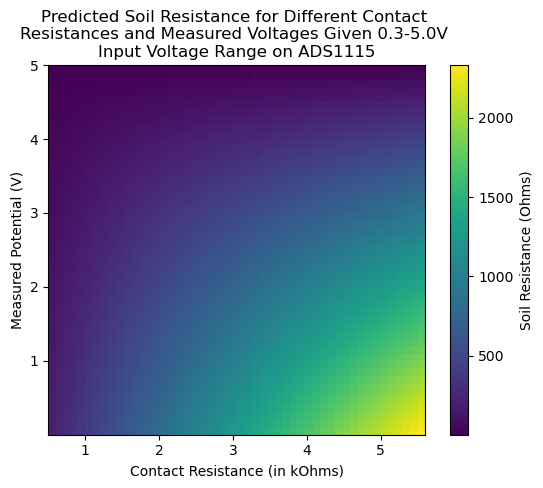

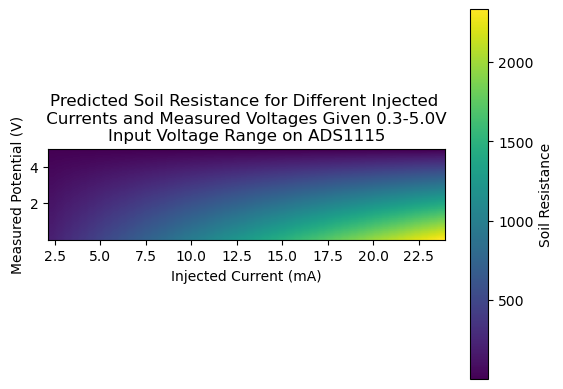

In [51]:
def r(v, i):
    return v/i

def rsoil(ps, rlead, rcontact, vmeas): 
    i = ps/(rlead + rcontact)  # find injected current
    return r(vmeas, i) # return soil resistance from voltmeter


ps = 12
rlead = 1.02
rcontact = np.linspace(500, 5600)
vmeas = np.linspace(0.3e-3, 5.0)
injcurrent = ps/(rlead + rcontact)

rcs, vms = np.meshgrid(rcontact, vmeas)
soil = rsoil(ps, rlead, rcs, vms)

plt.imshow(soil, extent=[min(rcontact)/1000,max(rcontact)/1000,min(vmeas),max(vmeas)])

plt.xlabel("Contact Resistance (in kOhms)")
plt.ylabel("Measured Potential (V)")
plt.colorbar(label="Soil Resistance (Ohms)")
plt.title("Predicted Soil Resistance for Different Contact \nResistances and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()


# Now showing injected current.

rcs, vms = np.meshgrid(injcurrent, vmeas)

plt.imshow(soil, extent=[min(injcurrent)*1000,max(injcurrent)*1000,min(vmeas),max(vmeas)])

plt.xlabel("Injected Current (mA)")
plt.ylabel("Measured Potential (V)")
plt.colorbar(label="Soil Resistance")
plt.title("Predicted Soil Resistance for Different Injected \n Currents and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()


In [22]:
print(np.max(soil), np.min(soil))

2473.7838333333334 0.012525499999999998


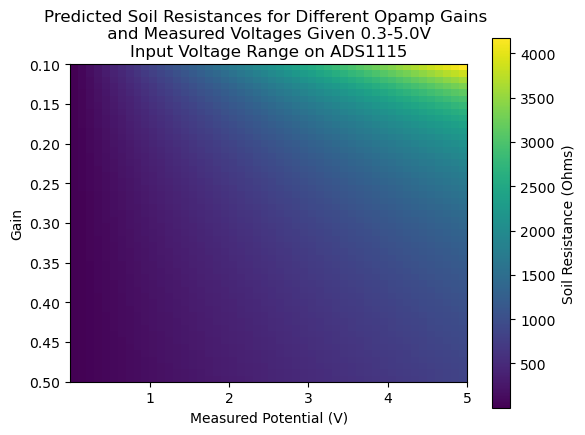

0.0006 50.0
0.1 0.5


In [86]:
"""
So we want resistivity, which is proportional to resistance (times a geometric factor).
So I'm going to assume the geometric factor is 1 and instead set the contact resistance to 1000 Ohms and
look at the soil resistance as a function of fractional gain in the opamps. Then I will also plot the maximum and 
minimum soil resistance as a function of fractional gain. Ideally we want a range of ~0.02-10k ohms or something.
"""

gain = np.linspace(0.1, 0.5)
vmss, gains = np.meshgrid(vmeas, gain)
vactual = vmeas/gains
soil2 = rsoil(ps, rlead, 1000, vactual)

plt.imshow(soil2, extent=[min(vmeas),max(vmeas),max(gain),min(gain)], aspect=max(vmeas)/max(gain))

plt.xlabel("Measured Potential (V)")
plt.ylabel("Gain")
plt.colorbar(label="Soil Resistance (Ohms)")
plt.title("Predicted Soil Resistances for Different Opamp Gains \n and Measured Voltages Given 0.3-5.0V \nInput Voltage Range on ADS1115") 

plt.show()
print(np.min(vactual), np.max(vactual))
print(np.min(gains), np.max(gains))


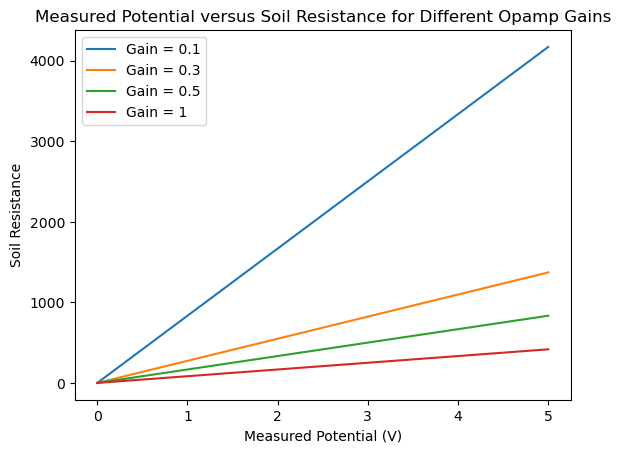

In [103]:
plt.title("Measured Potential versus Soil Resistance for Different Opamp Gains")
plt.xlabel("Measured Potential (V)")
plt.ylabel("Soil Resistance")
plt.plot(vmss[0], soil2[0], label="Gain = 0.1")
plt.plot(vmss[25], soil2[25], label=f"Gain = {round(gain[25], 2)}")
plt.plot(vmss[len(vmeas)-1], soil2[len(vmeas)-1], label=f"Gain = {round(gain[len(vmeas)-1], 2)}")
plt.plot(vmeas, rsoil(ps, rlead, 1000, vmeas), label="Gain = 1")
plt.legend()

Text(0, 0.5, 'Soil Resistance (Ohms)')

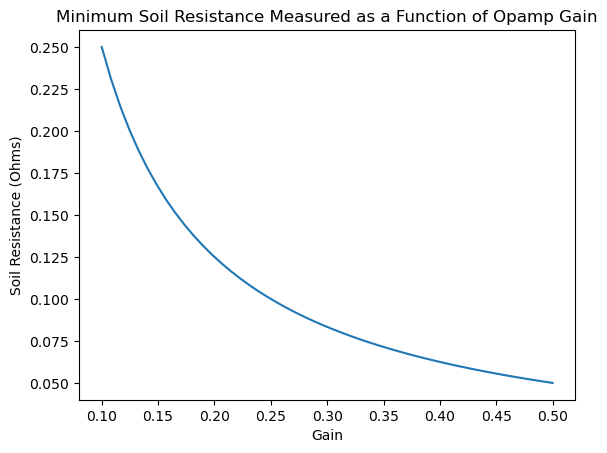

In [115]:
plt.plot(gains[:,0], soil2[:,0])
# plt.plot(gains[:,1], soil2[:,1])
# plt.plot(gains[:,2], soil2[:,2])
# plt.plot(gains[:,3], soil2[:,3])
# plt.plot(gains[:,3], soil2[:,3])

# for i in range(50):
#     plt.plot(gains[:,i], soil2[:,i])

plt.title("Minimum Soil Resistance Measured as a Function of Opamp Gain")
plt.xlabel("Gain")
plt.ylabel("Soil Resistance (Ohms)")

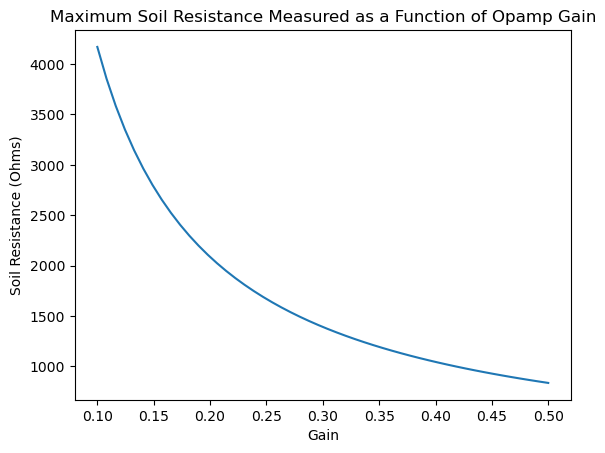

In [117]:
plt.title("Maximum Soil Resistance Measured as a Function of Opamp Gain")
plt.xlabel("Gain")
plt.ylabel("Soil Resistance (Ohms)")
plt.plot(gains[:,len(vmeas)-1], soil2[:,len(vmeas)-1])

In [ ]:
plt.title("Range of Resistances We Can Measure as a Function of Opamp Gain")
plt.xlabel("Gain")
plt.ylabel("Soil Resistance (Ohms)")
plt.plot(gains[:,len(vmeas)-1], soil2[:,len(vmeas)-1])